
Fitness Tracker Menu:
1. Add Activity
2. View History
3. Set Weekly Goal
4. View Reports
5. Calculate BMI
6. View Health Tips
7. Exit
Enter your choice : 1
Enter activity details:
Enter date (YYYY-MM-DD): 2024-12-12
Valid activities are:
Running
Cycling
Yoga
Others
Enter name of acitivity: Yoga
Enter duration (minutes): 20
Enter calories burned: 40
Activity added successfully!

Fitness Tracker Menu:
1. Add Activity
2. View History
3. Set Weekly Goal
4. View Reports
5. Calculate BMI
6. View Health Tips
7. Exit
Enter your choice : 2
Activity History:
         Date Activity Name  Duration (minutes)  Calories Burned  Duration
0  2024-12-01          Yoga                 NaN               30      30.0
1  2024-01-01          Yoga                 NaN               45      20.0
2  2024-12-12          Yoga                20.0               40       NaN

Fitness Tracker Menu:
1. Add Activity
2. View History
3. Set Weekly Goal
4. View Reports
5. Calculate BMI
6. View Health Tips
7. Exit
Enter you

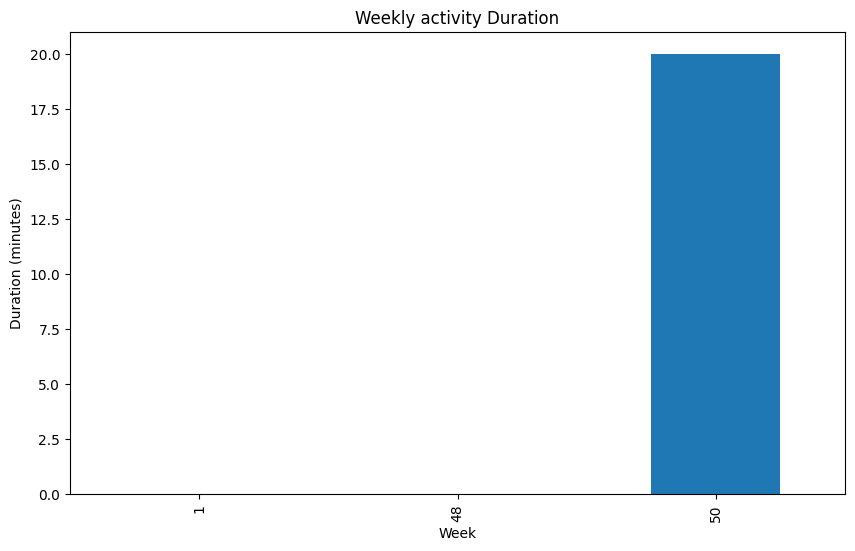


Fitness Tracker Menu:
1. Add Activity
2. View History
3. Set Weekly Goal
4. View Reports
5. Calculate BMI
6. View Health Tips
7. Exit
Enter your choice : 6
Health Tips:
-Drink plenty of water throughout the day.
-Get at least 7-8 hours of sleep
-Eat a balanced diet rich in fruits,vegetables,and whole grains.
-Exercise regularly to maintain a healthy weight

Fitness Tracker Menu:
1. Add Activity
2. View History
3. Set Weekly Goal
4. View Reports
5. Calculate BMI
6. View Health Tips
7. Exit
Enter your choice : 7
Exiting the Fitness Tracker. Goodbye!


In [9]:
import csv
import pandas as pd
import random
import matplotlib.pyplot as plt
from datetime import datetime
import os

CSV_FILE = "fitness_data.csv"
acitivities=["Running","Cycling","Yoga","Others"]
def load_csv():
  if os.path.exists(CSV_FILE):
    df=pd.read_csv(CSV_FILE)
  else:
    df=pd.DataFrame(columns=["Date","Activity Name","Duration (minutes)","Calories Burned"])
  return df

def save_csv(df):
  df.to_csv(CSV_FILE,index=False)
def valid_activities():
  print("Valid activities are:")
  for activity in acitivities:
    print(activity)
  activity=input("Enter name of acitivity: ")
  while activity not in acitivities:
    print("Invalid activity name. Please try again.")
    activity=input("Enter name of acitivity: ")
  return activity

def add_acitvity(df):
  print("Enter activity details:")
  date=input("Enter date (YYYY-MM-DD): ")
  activity=valid_activities()
  duration=int(input("Enter duration (minutes): "))
  calories_burned=int(input("Enter calories burned: "))
  new_row={"Date":date,"Activity Name":activity,"Duration (minutes)":duration,"Calories Burned":calories_burned}
  new_df=pd.DataFrame([new_row])
  df=pd.concat([df,new_df],ignore_index=True)
  save_csv(df)
  print("Activity added successfully!")
  return df

def view_history(df):
  if df.empty:
    print("No activity history available.")
  else:
    print("Activity History:")
    print(df)

def set_goal():
  global weekly_goal,daiily_goal
  weekly_goal=int(input("Enter weekly goal (calories): "))
  daily_goal=weekly_goal/7
  print(f"Daily goal set to {daily_goal} calories.")

def view_reports():
  try:
    df=pd.read_csv(CSV_FILE)
    df["Date"]=pd.to_datetime(df["Date"])
    df["week"]=df["Date"].dt.isocalendar().week
    weekly_summary=df.groupby("week")[["Duration (minutes)","Calories Burned"]].sum()
    print("Weekly Summary:")
    print(weekly_summary[["Duration (minutes)","Calories Burned"]])
    print("\n")

    if "weekly_goal" in globals():
      total_duration=weekly_summary["Duration (minutes)"].sum()
      print(f"\nWeekly Goal: {weekly_goal} calories")
      print(f"Total Duration: {total_duration} minutes")
      if total_duration>=weekly_goal:
        print("You have exceeded your weekly goal.")
      else:
        print("You have not exceeded your weekly goal.")
    plt.figure(figsize=(10,6))
    weekly_summary["Duration (minutes)"].plot(kind="bar")
    plt.xlabel("Week")
    plt.ylabel("Duration (minutes)")
    plt.title("Weekly activity Duration")
    plt.show()

  except FileNotFoundError:
    print("No activity history available.")

def bmi_cal():
  weight=float(input("Enter weight in kg: "))
  height=float(input("Enter height in cm: "))
  height_m=height/100
  bmi=weight/(height_m**2)
  print(f"Your BMI is: {bmi:.2f}")
  if bmi<18.5:
    print("You are underweight.")
  elif 18.5<=bmi<25:
    print("You are normal weight.")
  elif 25<=bmi<30:
    print("You are overweight.")
  else:
    print("You are obese.")


def health_tips():
  tips=[
      "Drink plenty of water throughout the day.",
      "Get at least 7-8 hours of sleep",
      "Eat a balanced diet rich in fruits,vegetables,and whole grains.",
      "Exercise regularly to maintain a healthy weight"
  ]
  print("Health Tips:")
  for tip in tips:
    print("-"+tip)


df=load_csv()
while True:
  print("\nFitness Tracker Menu:")
  print("1. Add Activity")
  print("2. View History")
  print("3. Set Weekly Goal")
  print("4. View Reports")
  print("5. Calculate BMI")
  print("6. View Health Tips")
  print("7. Exit")
  choice=input("Enter your choice : ")
  if choice=="1":
    df=add_acitvity(df)
    save_csv(df)
  elif choice=="2":
    view_history(df)
  elif choice=="3":
    set_goal()
  elif choice=="4":
    view_reports()
  elif choice=="5":
    bmi_cal()
  elif choice=="6":
    health_tips()
  elif choice=="7":
    save_csv(df)
    print("Exiting the Fitness Tracker. Goodbye!")
    break
  else:
    print("Invalid choice. Please try again.")



